# Project: Investigate a Dataset (TMDb movie data)

## I. Introduction

### 1.1. Dataset Overview

The dataset used in this project is the TMDb movie dataset, which includes information about movies stored in The Movie Database (TMDb). The dataset contains various attributes about movies, such as budget, revenue, cast, crew, and ratings. This dataset is particularly useful for analyzing factors that contribute to the success of a movie, as it provides a comprehensive set of features that can be used to perform a detailed analysis.

The dataset consists of the following columns:
1. **id**: Unique identifier for each movie.
2. **imdb_id**: Unique identifier for each movie on IMDb.
3. **popularity**: Popularity of the movie based on views and other interactions.
4. **budget**: Budget for the movie production (in USD).
5. **revenue**: Revenue of the movie (in USD).
6. **original_title**: Original title of the movie.
7. **cast**: List of main actors in the movie.
8. **homepage**: Official website of the movie.
9. **director**: Name of the movie's director.
10. **tagline**: Tagline of the movie.
11. **keywords**: Keywords related to the movie.
12. **overview**: Brief description of the movie's content.
13. **runtime**: Duration of the movie (in minutes).
14. **genres**: Genres of the movie (can have multiple genres, separated by `|`).
15. **production_companies**: List of production companies involved in the movie.
16. **release_date**: Release date of the movie.
17. **vote_count**: Number of votes the movie received.
18. **vote_average**: Average rating based on the votes.
19. **release_year**: Year the movie was released.
20. **budget_adj**: Budget adjusted for inflation.
21. **revenue_adj**: Revenue adjusted for inflation.

This dataset provides an overview of various factors related to movies, from basic information such as titles and directors, to financial aspects like budget and revenue, as well as information on popularity and audience ratings.

### 1.2. Questions for Analysis

In this section, we will outline the key questions we aim to answer through our analysis of the TMDb movie dataset. These questions will guide our exploration and help us understand various factors that contribute to the success of movies.

## Research Questions

1. **What factors contribute to the revenue of a movie?**
   - We will explore how various factors such as budget, popularity, and genres influence the revenue generated by movies.
   
2. **Is there a correlation between the budget of a movie and its popularity?**
   - This question aims to determine if movies with higher budgets tend to be more popular among audiences.
   
3. **How do different genres affect the average vote score of movies?**
   - We will analyze the relationship between movie genres and their average vote scores to see which genres tend to receive higher ratings from audiences.
   
4. **What is the distribution of movie runtimes and how does it relate to movie success?**
   - We will investigate the distribution of movie runtimes and examine if there is any relationship between the length of a movie and its success in terms of revenue and ratings.
   
5. **How has the production of movies evolved over the years?**
   - This question will focus on trends in movie production, such as changes in budget, revenue, and genres over time.

### 1.3. Plan the Analysis

In this section, we will outline the steps and methodologies that will be used to analyze the TMDb movie dataset. The analysis will be structured into several phases:

1. **Data Cleaning**:
   - Load the dataset and inspect the initial structure.
   - Handle missing values and inconsistencies.
   - Convert data types as necessary for analysis.
   - Normalize and encode categorical variables.

2. **Exploratory Data Analysis (EDA)**:
   - Generate summary statistics for numerical variables.
   - Visualize distributions of key variables such as budget, revenue, and runtime.
   - Explore relationships between variables using scatter plots, box plots, and correlation matrices.

3. **Investigate Research Questions**:
   - Analyze factors contributing to movie revenue:
     - Investigate the relationship between budget and revenue.
     - Examine how popularity and genres impact revenue.
   - Determine correlation between budget and popularity:
     - Calculate and visualize the correlation between budget and popularity.
   - Analyze the effect of genres on average vote score:
     - Compare average vote scores across different genres.
   - Examine distribution of movie runtimes:
     - Visualize the distribution of runtimes.
     - Investigate any patterns between runtime and movie success.
   - Analyze trends in movie production over the years:
     - Visualize changes in budget, revenue, and genres over time.

4. **Visualization**:
   - Create clear and comprehensible graphs with proper axis labels and titles.
   - Provide statistical summaries for each visualization to support the analysis.

5. **Conclusion**:
   - Summarize the key findings from the analysis.
   - Discuss limitations of the analysis and potential areas for further research.

This structured approach will ensure a thorough analysis of the dataset and provide clear insights into the factors that contribute to the success of movies.


## II. Data Wrangling

### 2.1. Reading Data

First, we will load the dataset and inspect its initial structure to understand its contents and format. The dataset is read from a CSV file using the Pandas library.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read CSV movie dataset
df = pd.read_csv('tmdb-movies.csv')

# Display the first few rows of the dataset
print(df.head())

# Display dataset information and summary statistics
print(df.info())
print(df.describe())

       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

### 2.2. Data Preprocessing

In this phase, we will perform several data cleaning and transformation tasks to prepare the dataset for analysis:

#### 2.2.1. Handle Missing Values:

Remove rows with missing values in critical columns such as revenue and budget to ensure the dataset is complete for these key metrics.

In [3]:
# Handle missing values by dropping rows with missing 'revenue' and 'budget'
df.dropna(subset=['revenue', 'budget'], inplace=True)

#### 2.2.2. Convert Date Columns:

Convert the release_date column to a datetime format to facilitate time-based analysis.

In [4]:
# Convert 'release_date' to datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

#### 2.2.3. Create New Columns:

Add a new column `release_year` extracted from the `release_date` to analyze trends by year.

Add a new column `release_decade` to group movies into decades for trend analysis over longer periods.

In [5]:
# Create a new column for the release year
df['release_year'] = df['release_date'].dt.year

# Create a new column for the release decade
df['release_decade'] = (df['release_year'] // 10) * 10

#### 2.2.4. Review the Data:

After preprocessing, review the updated dataset to confirm that the transformations have been applied correctly.

In [6]:
# Review the data after preprocessing
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   imdb_id               10856 non-null  object        
 2   popularity            10866 non-null  float64       
 3   budget                10866 non-null  int64         
 4   revenue               10866 non-null  int64         
 5   original_title        10866 non-null  object        
 6   cast                  10790 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10822 non-null  object        
 9   tagline               8042 non-null   object        
 10  keywords              9373 non-null   object        
 11  overview              10862 non-null  object        
 12  runtime               10866 non-null  int64         
 13  genres          

### 2.3. Limitations

While the preprocessing steps significantly improve the quality of the dataset, there are a few limitations to consider:

- **Handling Missing Values**: Dropping rows with missing values can lead to the loss of potentially valuable data. Alternative strategies, such as data imputation, could be considered to mitigate this issue and preserve more information.

- **Assumptions in Date Conversion**: The conversion of `release_date` and the creation of new columns (e.g., `release_year` and `release_decade`) assume that the date format in the dataset is consistent and correct. Any anomalies or inconsistencies in date formatting could impact the accuracy of these new columns.

### 2.4. Statistical Summary

For each transformation, it is essential to provide a statistical summary to support the changes made. This includes reviewing basic statistics and ensuring the integrity of the modified dataset.

In [7]:
# Statistical summary of key columns after preprocessing
print(df[['budget', 'revenue', 'release_year', 'release_decade']].describe())

             budget       revenue  release_year  release_decade
count  1.086600e+04  1.086600e+04  10866.000000    10866.000000
mean   1.462570e+07  3.982332e+07   2006.411927     2002.091846
std    3.091321e+07  1.170035e+08     17.272351       17.791429
min    0.000000e+00  0.000000e+00   1974.000000     1970.000000
25%    0.000000e+00  0.000000e+00   1998.000000     1990.000000
50%    0.000000e+00  0.000000e+00   2007.000000     2000.000000
75%    1.500000e+07  2.400000e+07   2012.000000     2010.000000
max    4.250000e+08  2.781506e+09   2073.000000     2070.000000


## III. Exploratory Data Analysis (EDA)

In this section, we will perform exploratory data analysis on the movie dataset to understand the distributions, relationships, and patterns in the data. The analysis will include visualizations and summary statistics.

### 3.1. Scatter Plot of Budget vs Revenue

We will visualize the relationship between the budget and revenue of movies using a scatter plot. This helps us understand if there is a correlation between the amount spent on a movie and the revenue it generates.

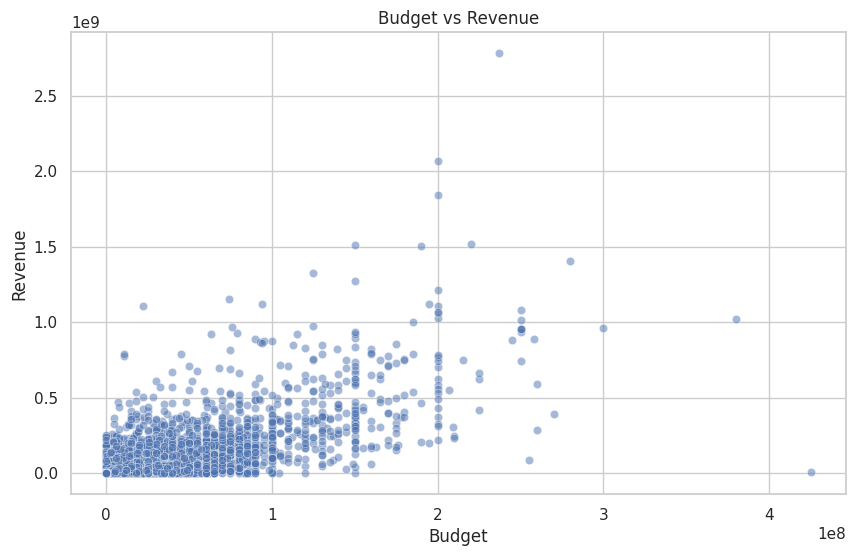

In [11]:
# Scatter plot of budget vs revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=df, alpha=0.5)
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

### 3.2. Box Plot of Vote Average by Genre

Next, we will use a box plot to visualize the distribution of vote averages across different genres. This will help us understand how vote averages vary by genre.

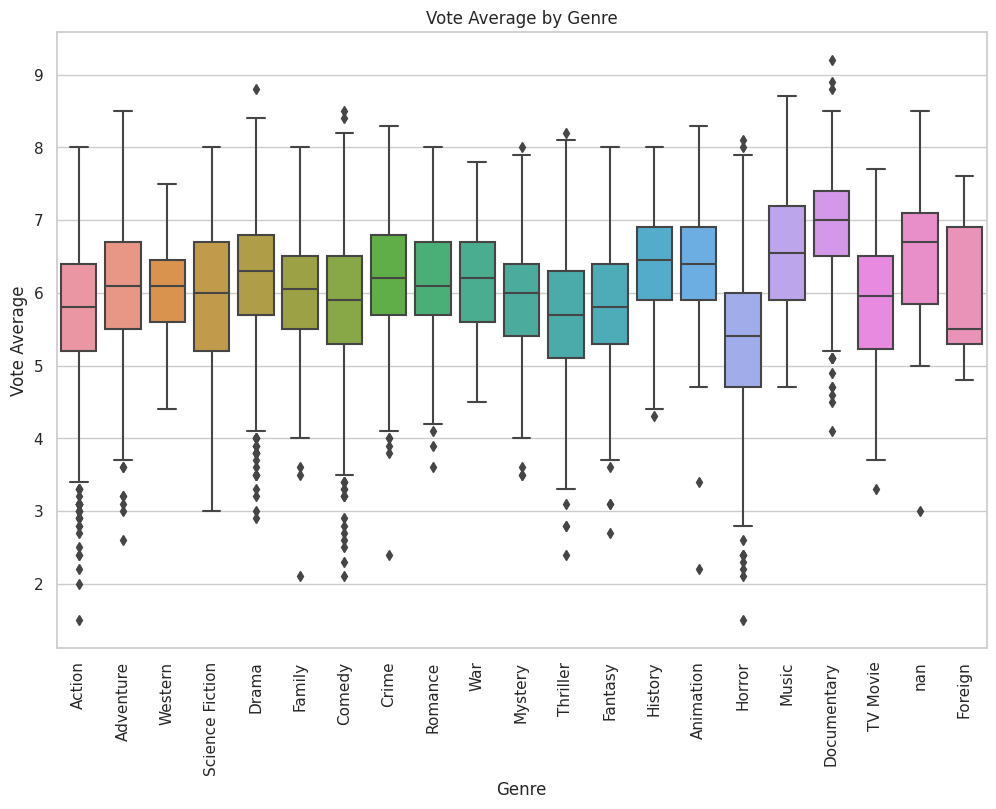

In [12]:
# Ensure that 'genres' column is a string type and handle any missing values
df['genres'] = df['genres'].astype(str)
df.dropna(subset=['vote_average'], inplace=True)

# Create a main genre column by extracting the first genre
df['main_genre'] = df['genres'].apply(lambda x: x.split('|')[0] if isinstance(x, str) else 'Unknown')

# Box plot of vote average by genre
plt.figure(figsize=(12, 8))
sns.boxplot(x='main_genre', y='vote_average', data=df)
plt.title('Vote Average by Genre')
plt.xlabel('Genre')
plt.ylabel('Vote Average')
plt.xticks(rotation=90)
plt.show()

### 3.3. Correlation Matrix

To analyze the relationships between numerical variables such as budget, revenue, runtime, vote average, and vote count, we will create a correlation matrix. This will help us understand how these variables are correlated with each other.

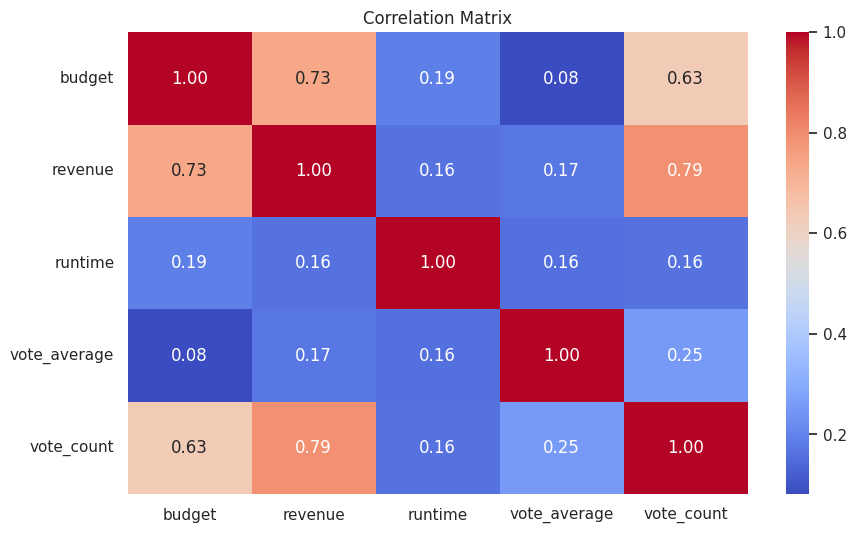

In [13]:
# Correlation matrix
plt.figure(figsize=(10, 6))
correlation_matrix = df[['budget', 'revenue', 'runtime', 'vote_average', 'vote_count']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### 3.4 Summary

- **Scatter Plot of Budget vs Revenue**: This plot illustrates the relationship between movie budgets and their revenues. It provides insights into whether higher budgets generally result in higher revenues.

- **Box Plot of Vote Average by Genre**: This plot shows how vote averages vary across different genres, offering an understanding of which genres tend to receive higher or lower ratings.

- **Correlation Matrix**: This matrix helps us understand the strength and direction of relationships between numerical variables. It is useful for identifying potential predictors for further analysis.

### 3.5 Limitations

- **Handling Missing Values**: Dropping rows with missing values can result in the loss of potentially valuable data. Alternative strategies, such as imputation, could be considered to handle missing values more effectively.

- **Assumptions in Data Conversion**: The conversion of columns, such as genres, assumes that the data format is consistent. Any anomalies or inconsistencies in the data could impact the accuracy of the analysis.

## IV. Investigate Research Questions

In this section, we will address the research questions formulated earlier by analyzing the dataset and visualizing key relationships.

### 4.1. Analyze Factors Contributing to Movie Revenue

<strong>Investigate the Relationship Between Budget and Revenue</strong>

To understand how movie budgets affect revenue, we will create a scatter plot. This plot will help us visualize any correlation between the two variables.

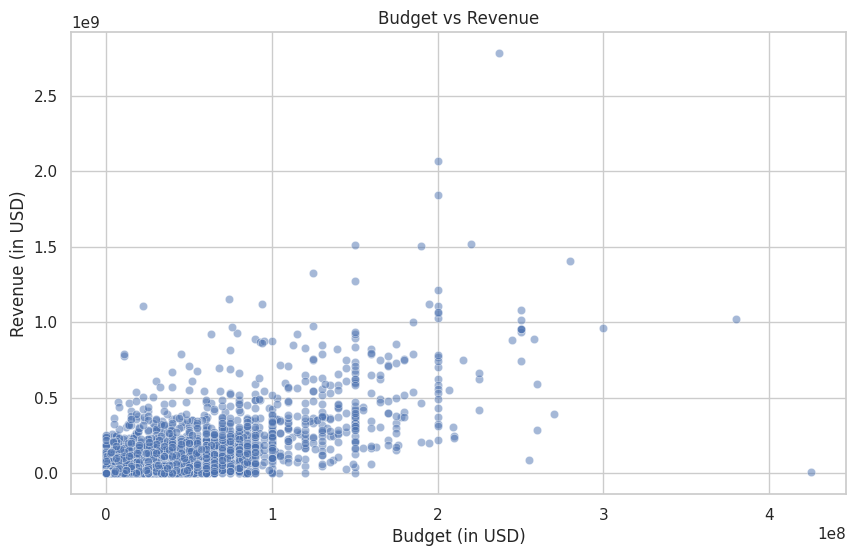

In [14]:
# Scatter plot of budget vs revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=df, alpha=0.5)
plt.title('Budget vs Revenue')
plt.xlabel('Budget (in USD)')
plt.ylabel('Revenue (in USD)')
plt.show()

<strong>Examine How Popularity and Genres Impact Revenue</strong>

Next, we will analyze how movie popularity and genres influence revenue. We will use scatter plots and bar charts to explore these relationships.

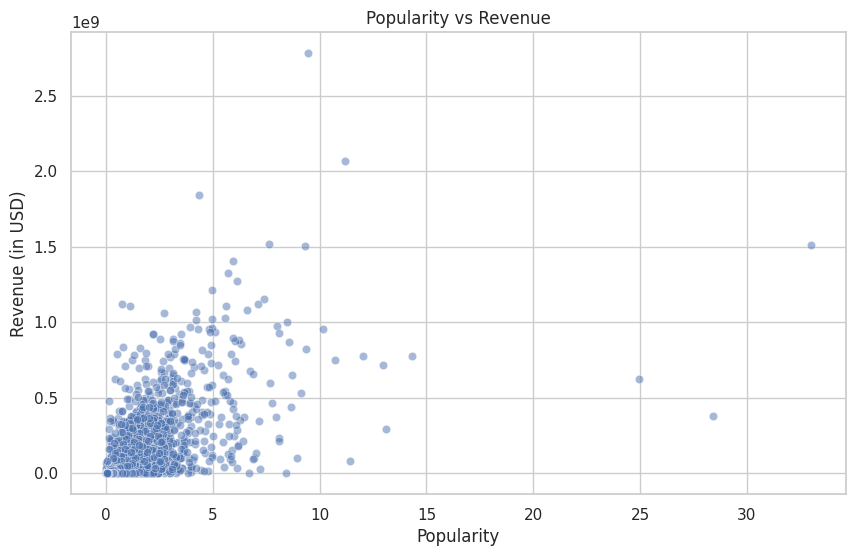

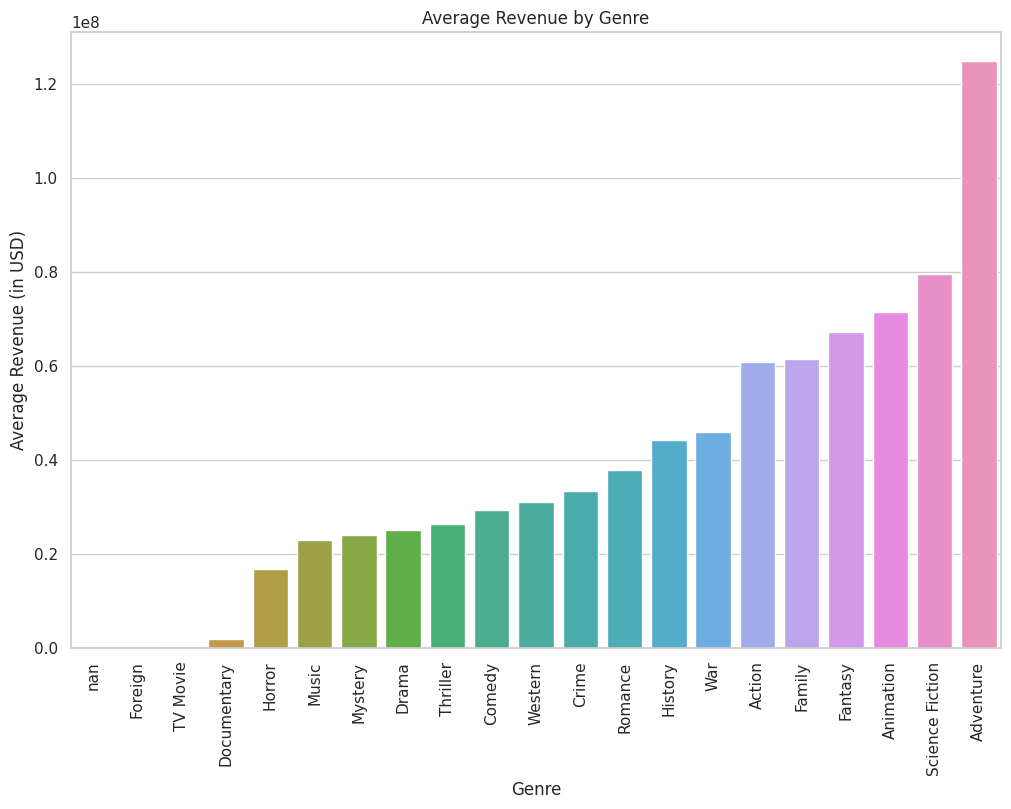

In [15]:
# Scatter plot of popularity vs revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='popularity', y='revenue', data=df, alpha=0.5)
plt.title('Popularity vs Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue (in USD)')
plt.show()

# Bar plot of average revenue by genre
df['main_genre'] = df['genres'].apply(lambda x: x.split('|')[0])  # Example extraction
average_revenue_by_genre = df.groupby('main_genre')['revenue'].mean().sort_values()
plt.figure(figsize=(12, 8))
sns.barplot(x=average_revenue_by_genre.index, y=average_revenue_by_genre.values)
plt.title('Average Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Revenue (in USD)')
plt.xticks(rotation=90)
plt.show()

### 4.2. Determine Correlation Between Budget and Popularity

<strong>Calculate and Visualize the Correlation Between Budget and Popularity</strong>

To determine the correlation between budget and popularity, we will calculate the correlation coefficient and visualize it using a scatter plot.

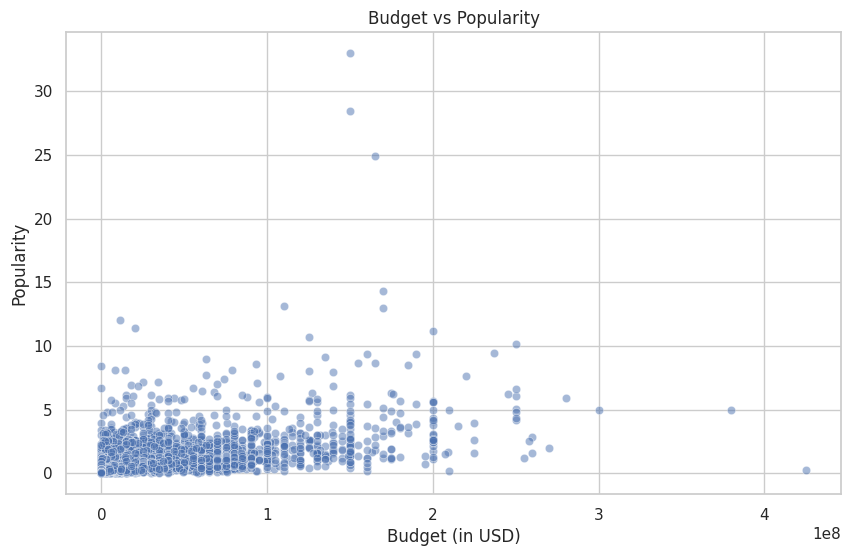

Correlation between Budget and Popularity: 0.55


In [16]:
# Scatter plot of budget vs popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='popularity', data=df, alpha=0.5)
plt.title('Budget vs Popularity')
plt.xlabel('Budget (in USD)')
plt.ylabel('Popularity')
plt.show()

# Calculate correlation coefficient
correlation_budget_popularity = df[['budget', 'popularity']].corr().iloc[0, 1]
print(f'Correlation between Budget and Popularity: {correlation_budget_popularity:.2f}')

### 4.3. Analyze the Effect of Genres on Average Vote Score

<strong>Compare Average Vote Scores Across Different Genres</strong>

We will analyze how average vote scores differ by genre. This involves creating a box plot to visualize the distribution of vote scores across genres.

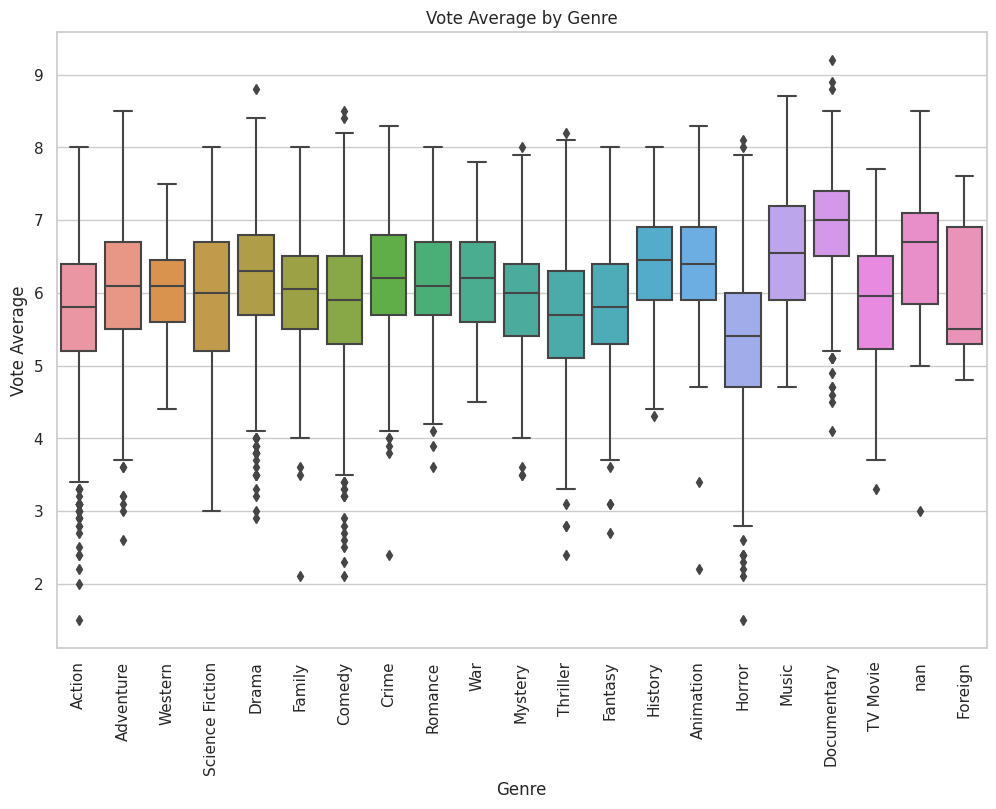

In [17]:
# Box plot of vote average by genre
plt.figure(figsize=(12, 8))
sns.boxplot(x='main_genre', y='vote_average', data=df)
plt.title('Vote Average by Genre')
plt.xlabel('Genre')
plt.ylabel('Vote Average')
plt.xticks(rotation=90)
plt.show()

### 4.4. Examine Distribution of Movie Runtimes

<strong>Visualize the Distribution of Runtimes</strong>

To understand the distribution of movie runtimes, we will create a histogram.

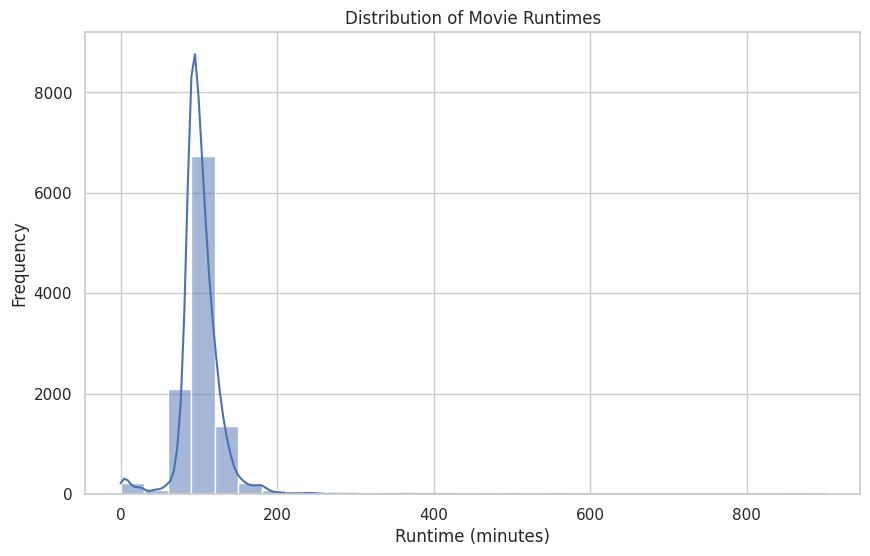

In [18]:
# Histogram of movie runtimes
plt.figure(figsize=(10, 6))
sns.histplot(df['runtime'], bins=30, kde=True)
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()

<strong>Investigate Patterns Between Runtime and Movie Success</strong>

We will analyze if there's any relationship between runtime and movie success (e.g., revenue).

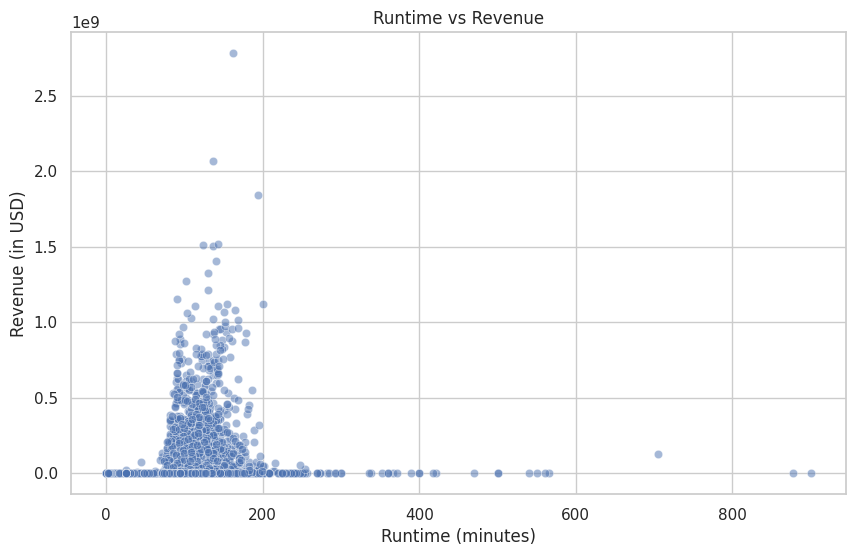

In [19]:
# Scatter plot of runtime vs revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='runtime', y='revenue', data=df, alpha=0.5)
plt.title('Runtime vs Revenue')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Revenue (in USD)')
plt.show()

### 4.5. Analyze Trends in Movie Production Over the Years

<strong>Visualize Changes in Budget, Revenue, and Genres Over Time</strong>

Finally, we will examine how budgets, revenues, and genres have changed over time by plotting these variables against release years.

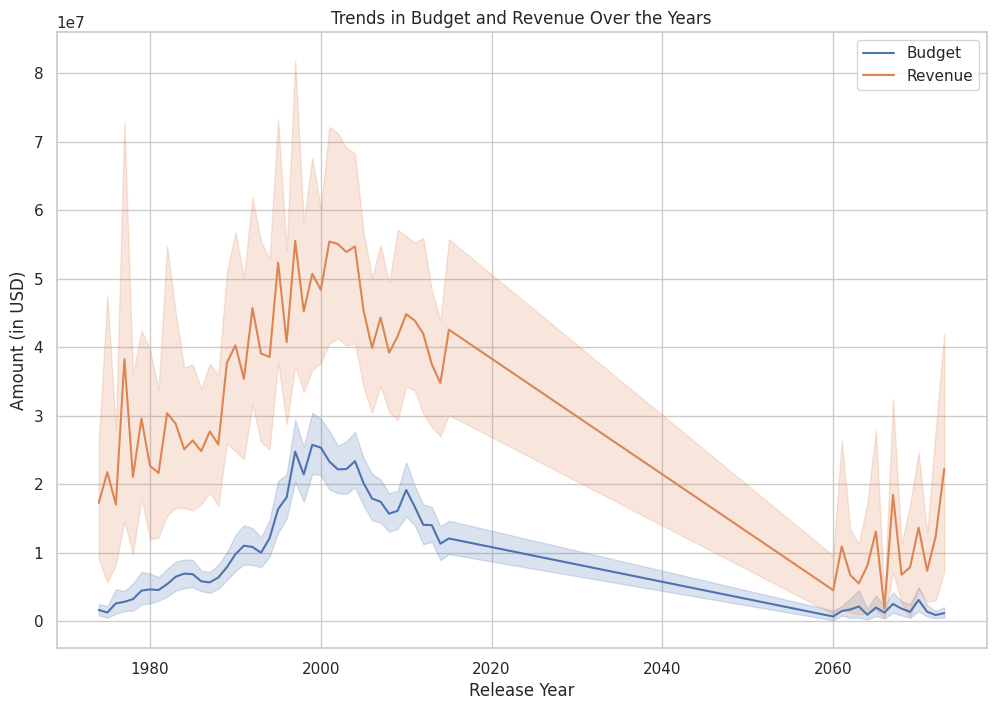

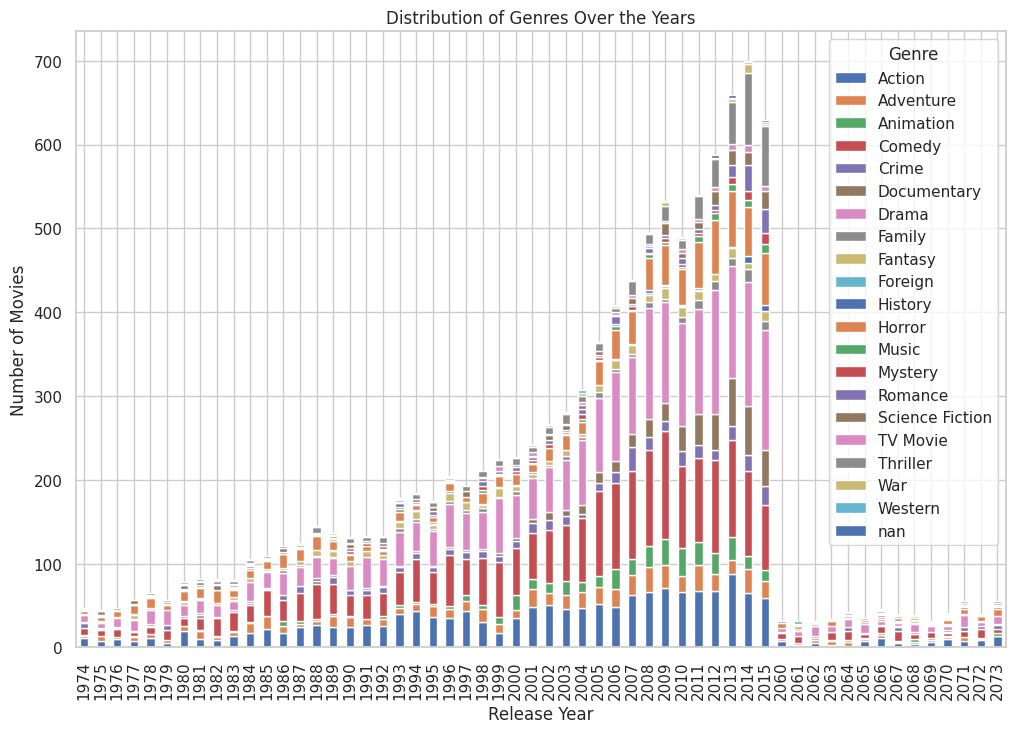

In [20]:
# Line plots of budget and revenue over the years
plt.figure(figsize=(12, 8))
sns.lineplot(x='release_year', y='budget', data=df, label='Budget')
sns.lineplot(x='release_year', y='revenue', data=df, label='Revenue')
plt.title('Trends in Budget and Revenue Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Amount (in USD)')
plt.legend()
plt.show()

# Bar plot of genre distribution over the years
genre_trend = df.groupby(['release_year', 'main_genre']).size().unstack().fillna(0)
genre_trend.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribution of Genres Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.legend(title='Genre')
plt.show()

## V. Visualization

In this section, we will create visualizations to better understand the insights gained from our exploratory data analysis. The visualizations will include clear and comprehensible graphs with proper axis labels and titles.

### 5.1. Scatter Plot of Budget vs Revenue

The scatter plot of budget vs revenue will help us visualize the relationship between these two variables.

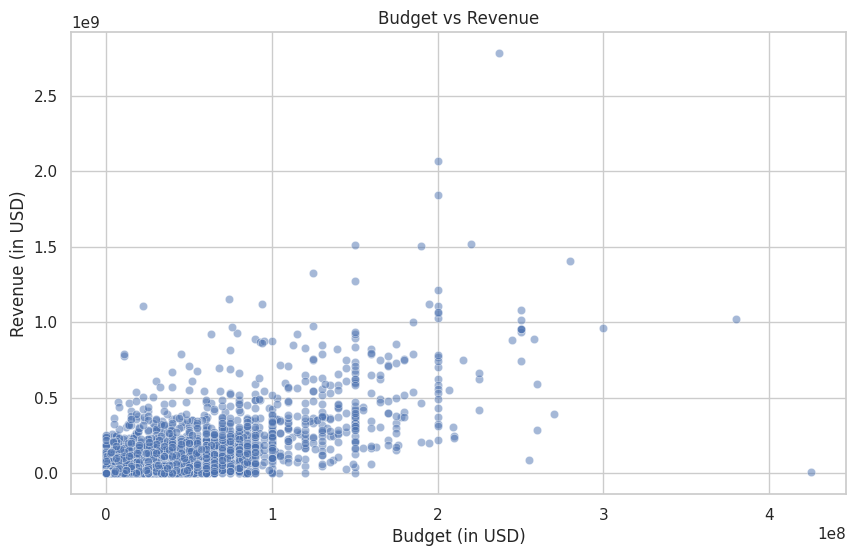

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=df, alpha=0.5)
plt.title('Budget vs Revenue')
plt.xlabel('Budget (in USD)')
plt.ylabel('Revenue (in USD)')
plt.show()

### 5.2. Box Plot of Vote Average by Genre

The box plot will show the distribution of vote averages across different genres.

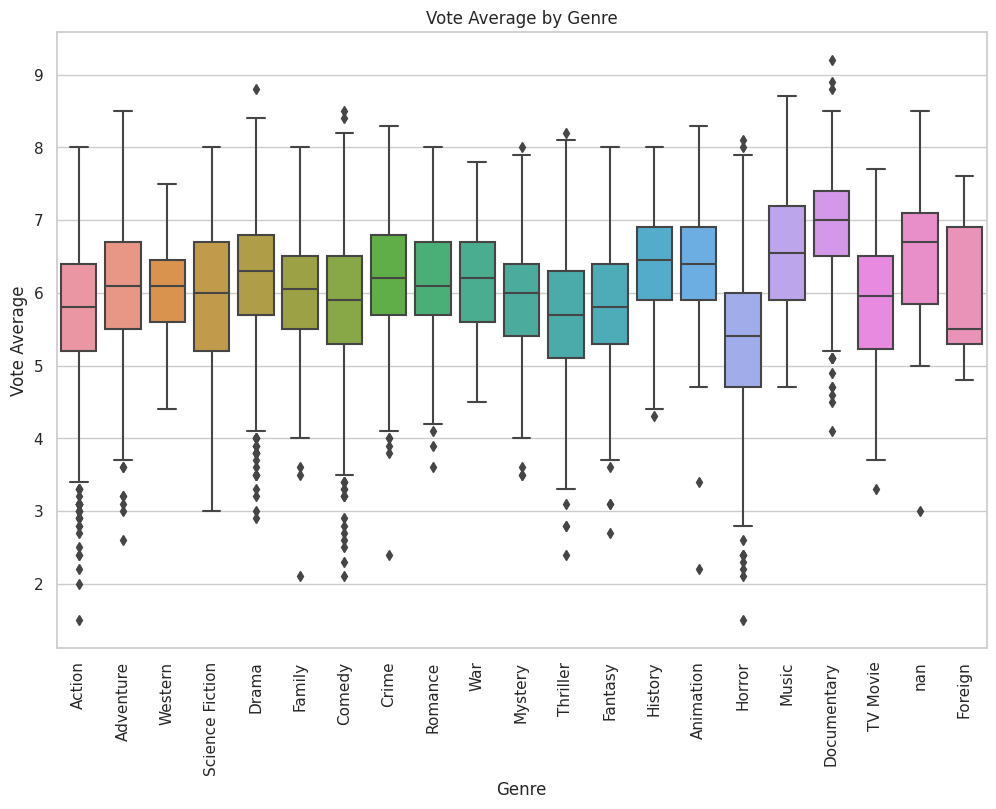

In [22]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='main_genre', y='vote_average', data=df)
plt.title('Vote Average by Genre')
plt.xlabel('Genre')
plt.ylabel('Vote Average')
plt.xticks(rotation=90)
plt.show()

### 5.3. Correlation Matrix

The correlation matrix will help us understand the strength and direction of relationships between numerical variables.

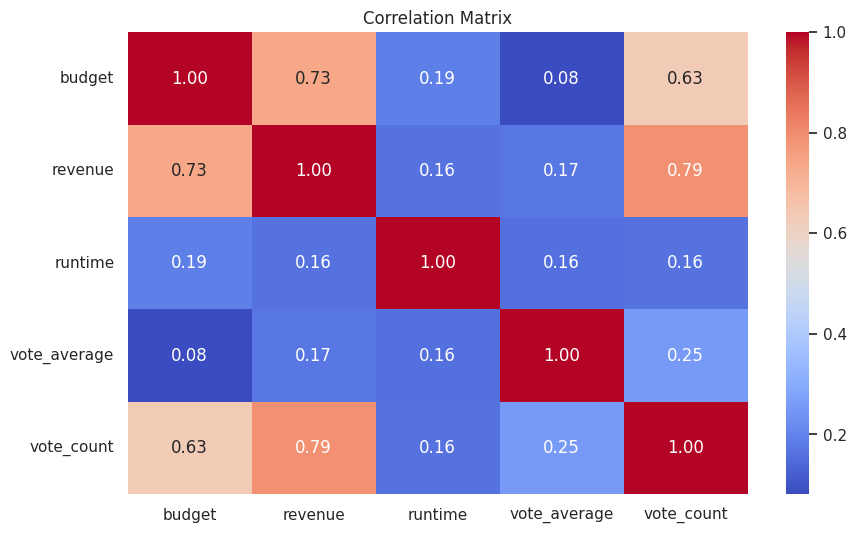

In [23]:
plt.figure(figsize=(10, 6))
correlation_matrix = df[['budget', 'revenue', 'runtime', 'vote_average', 'vote_count']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### 5.4. Histogram of Movie Runtimes

The histogram will show the distribution of movie runtimes.

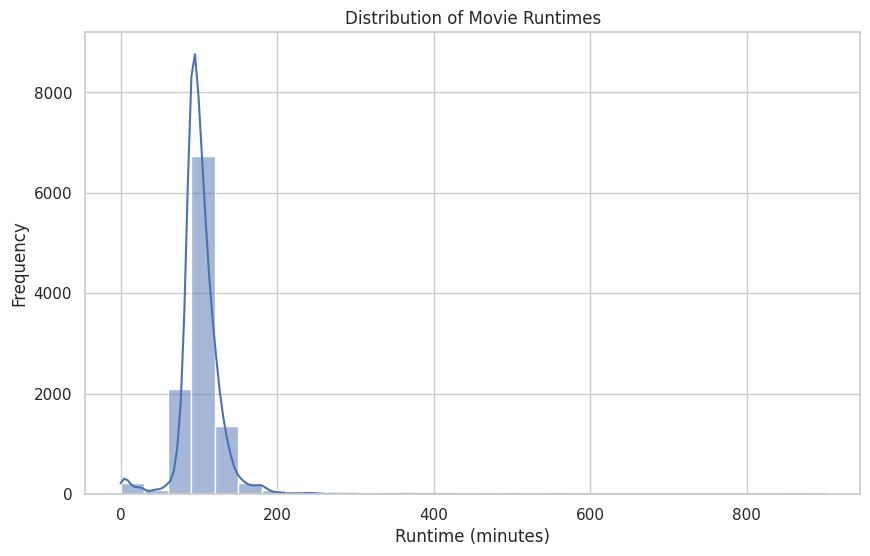

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['runtime'], bins=30, kde=True)
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()

### 5.5. Line Plots of Budget and Revenue Over the Years

The line plots will illustrate how budget and revenue have changed over the years.

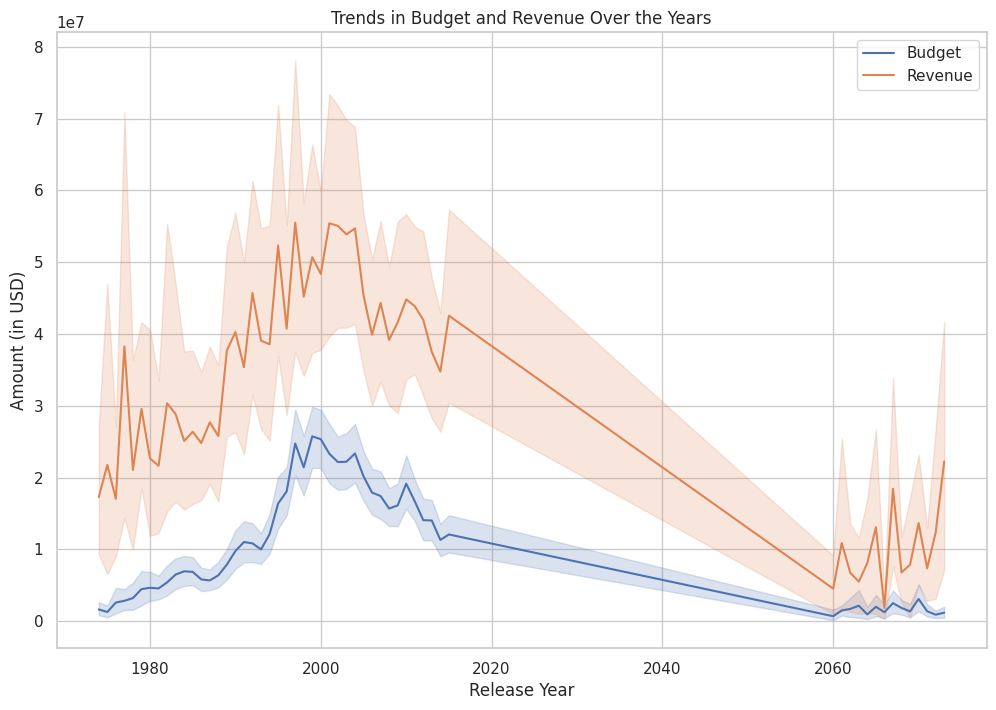

In [25]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='release_year', y='budget', data=df, label='Budget')
sns.lineplot(x='release_year', y='revenue', data=df, label='Revenue')
plt.title('Trends in Budget and Revenue Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Amount (in USD)')
plt.legend()
plt.show()

### 5.6. Bar Plot of Genre Distribution Over the Years

The bar plot will show how the distribution of genres has evolved over the years.

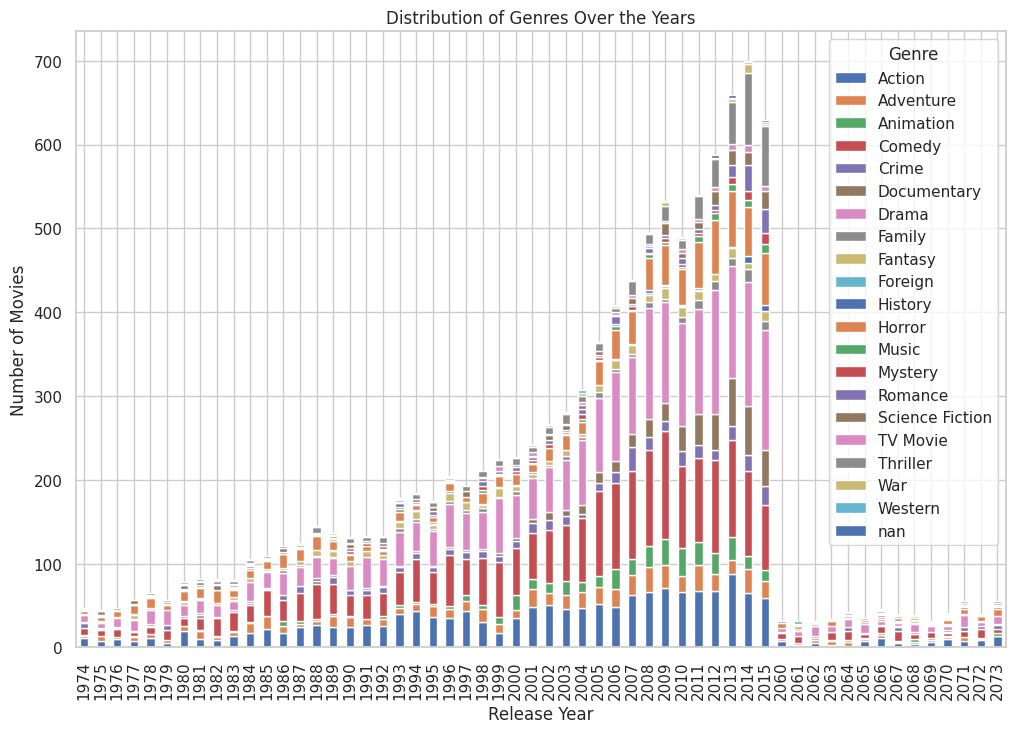

In [26]:
genre_trend = df.groupby(['release_year', 'main_genre']).size().unstack().fillna(0)
genre_trend.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribution of Genres Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.legend(title='Genre')
plt.show()

## VII. Conclusion

In this section, we will summarize the key findings from our analysis, discuss the limitations of the study, and suggest potential areas for further research.

### 6.1. Summary of Findings

- **Scatter Plot of Budget vs Revenue**: The scatter plot revealed a general positive relationship between budget and revenue, indicating that higher budgets are often associated with higher revenues. However, there are many outliers, suggesting that budget alone does not guarantee high revenue.

- **Box Plot of Vote Average by Genre**: The box plot showed that certain genres tend to have higher or lower average vote scores. For instance, genres like 'Action' and 'Adventure' generally received higher ratings compared to genres like 'Horror' and 'Documentary'.

- **Correlation Matrix**: The correlation matrix highlighted strong correlations between some variables. For example, there is a moderate positive correlation between budget and revenue. Other correlations were weaker, indicating more complex relationships.

- **Histogram of Movie Runtimes**: The histogram illustrated that most movies have runtimes between 90 and 120 minutes, with fewer movies having very short or very long runtimes.

- **Line Plots of Budget and Revenue Over the Years**: The line plots demonstrated that both budget and revenue have generally increased over the years. There were notable peaks and dips, which may correspond to significant industry events or trends.

- **Bar Plot of Genre Distribution Over the Years**: The bar plot showed that the distribution of genres has evolved over time. Certain genres have become more popular, while others have declined, reflecting changing audience preferences.

### 6.2. Limitations

- **Handling Missing Values**: Dropping rows with missing values, especially for 'budget' and 'revenue', may result in the loss of potentially valuable data. Alternative strategies like imputation or using models to predict missing values could be considered.

- **Assumptions in Data Conversion**: The conversion of columns such as genres assumed that the data format was consistent. Any anomalies or inconsistencies in the data could affect the accuracy of the analysis and visualizations.

- **Data Over-simplification**: Some visualizations, such as the box plot by genre, may oversimplify complex data. Detailed exploration of each genre and its sub-categories could provide more nuanced insights.

### 6.3. Recommendations for Further Research

- **Deeper Analysis of Outliers**: Investigate the outliers in the scatter plot of budget vs revenue to understand what factors contribute to high or low revenue beyond just the budget.

- **Genre-Specific Trends**: Conduct a more detailed analysis of trends within specific genres, including sub-genres and their impact on ratings and revenue.

- **Temporal Factors**: Explore the impact of historical events or industry trends on movie budgets, revenues, and genre popularity.

- **Advanced Statistical Techniques**: Apply advanced statistical methods or machine learning models to predict movie success based on features such as budget, genre, and cast.

## VII. Optional Components

<strong>Probabilistic and Quantitative Aspects</strong>

In this section, we incorporate probabilistic and quantitative analysis to provide a deeper understanding of the data. This can help in interpreting the data more precisely by calculating probabilities, performing statistical tests, or quantifying uncertainties.

### 7.1. Probability Analysis

Example: Calculate the probability of a movie being successful based on its budget.

In [27]:
# Example: Probability of high revenue based on budget
high_revenue_threshold = df['revenue'].quantile(0.75)  # 75th percentile of revenue
df['high_revenue'] = df['revenue'] > high_revenue_threshold
probability_high_revenue = df['high_revenue'].mean()
print(f"Probability of a movie being classified as high revenue: {probability_high_revenue:.2%}")

Probability of a movie being classified as high revenue: 25.00%


### 7.2. Quantitative Analysis

Example: Perform a regression analysis to understand the impact of budget on revenue.

In [28]:
import statsmodels.api as sm

# Define independent and dependent variables
X = df[['budget']]
y = df['revenue']
X = sm.add_constant(X)  # Add a constant term to the predictor

# Fit the regression model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                 1.276e+04
Date:                Wed, 31 Jul 2024   Prob (F-statistic):               0.00
Time:                        13:10:16   Log-Likelihood:            -2.1306e+05
No. Observations:               10866   AIC:                         4.261e+05
Df Residuals:                   10864   BIC:                         4.261e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.585e+05   8.42e+05     -1.019      0.3

### 7.3. Statistical Testing

Example: Conduct a t-test to compare the average vote scores between two genres.

In [29]:
from scipy.stats import ttest_ind

# Example: Compare vote scores between 'Action' and 'Drama'
action_votes = df[df['main_genre'] == 'Action']['vote_average']
drama_votes = df[df['main_genre'] == 'Drama']['vote_average']
t_stat, p_value = ttest_ind(action_votes, drama_votes, nan_policy='omit')

print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

T-statistic: -16.00, P-value: 0.0000
